In [73]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [74]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [75]:
len(x_train)

60000

In [76]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

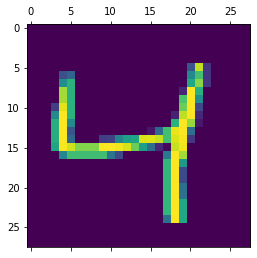

In [77]:
plt.matshow(x_train[2])

In [78]:
y_train[2]

4

In [79]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [80]:
x_train=x_train/255
x_test=x_test/255

In [81]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)
x_train_flatten.shape

(60000, 784)

In [82]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [83]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train_flatten,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4849 - accuracy: 0.8788
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3055 - accuracy: 0.9157
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2854 - accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2745 - accuracy: 0.9242
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2677 - accuracy: 0.9263
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2624 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2585 - accuracy: 0.9287
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2555 - accuracy: 0.9299
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2525 - accuracy: 0.9308
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [92]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.9284


[0.25789764523506165, 0.9283999800682068]

In [85]:
y_predict=model.predict(x_test_flatten)

In [86]:
y_predict[0]

array([2.2183956e-06, 1.6481013e-12, 7.6942679e-06, 6.7045093e-03,
       3.0715290e-07, 6.4285043e-05, 2.3059422e-11, 7.0455277e-01,
       3.2150845e-05, 3.2177567e-04], dtype=float32)

In [87]:
np.argmax(y_predict[1])

2

In [88]:
y_predict_label=[np.argmax(i) for i in y_predict]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [89]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1111,    5,    1,    0,    1,    4,    2,   11,    0],
       [   3,    5,  959,    8,    6,    5,   11,    9,   22,    4],
       [   2,    0,   28,  915,    0,   24,    2,   13,   21,    5],
       [   1,    2,    7,    2,  919,    0,    7,    4,   10,   30],
       [   9,    2,    8,   27,    9,  788,    9,    7,   26,    7],
       [   9,    3,   10,    1,    7,   11,  913,    2,    2,    0],
       [   1,    7,   26,    5,    7,    1,    0,  954,    1,   26],
       [   7,    7,   11,   22,    8,   25,   10,   12,  865,    7],
       [   9,    7,    2,   11,   25,    6,    0,   32,    7,  910]])>

Text(69.0, 0.5, 'Truth')

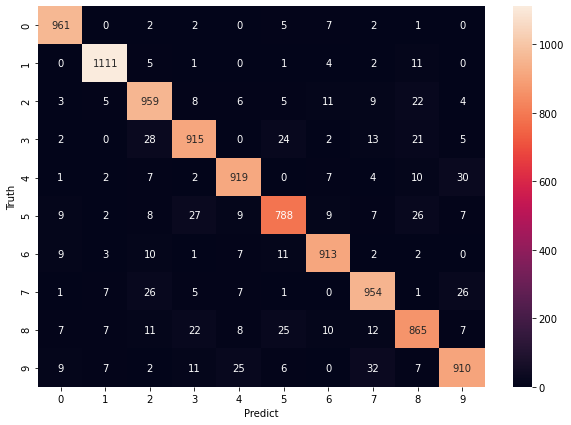

In [90]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('Truth')

In [91]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5312 - accuracy: 0.8554
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2821 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2721 - accuracy: 0.9248
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2638 - accuracy: 0.9269
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2576 - accuracy: 0.9283
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2522 - accuracy: 0.9302
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2478 - accuracy: 0.9314
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2432 - accuracy: 0.9321
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [93]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.9284


[0.25789764523506165, 0.9283999800682068]

In [94]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1111,    5,    1,    0,    1,    4,    2,   11,    0],
       [   3,    5,  959,    8,    6,    5,   11,    9,   22,    4],
       [   2,    0,   28,  915,    0,   24,    2,   13,   21,    5],
       [   1,    2,    7,    2,  919,    0,    7,    4,   10,   30],
       [   9,    2,    8,   27,    9,  788,    9,    7,   26,    7],
       [   9,    3,   10,    1,    7,   11,  913,    2,    2,    0],
       [   1,    7,   26,    5,    7,    1,    0,  954,    1,   26],
       [   7,    7,   11,   22,    8,   25,   10,   12,  865,    7],
       [   9,    7,    2,   11,   25,    6,    0,   32,    7,  910]])>

Text(69.0, 0.5, 'Truth')

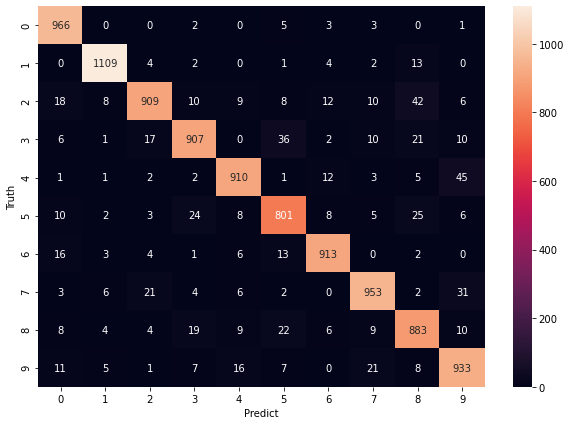

In [97]:
y_predict=model.predict(x_test_flatten)
y_predict_label=[np.argmax(i) for i in y_predict]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('Truth')

In [99]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5244 - accuracy: 0.8468
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3006 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2799 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2692 - accuracy: 0.9246
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2604 - accuracy: 0.9272
